In [1]:
from torch.utils.data import DataLoader
from utils.EnergyDataset import EnergyDataset

ds = EnergyDataset('../data/Final_Energy_dataset.csv','../data/price.csv', 144, 5, 'train')
dl = DataLoader(dataset=ds, batch_size=32, shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class TimeSeriesNN(nn.Module):
    def __init__(self, input_size=144, hidden_size=64):
        super(TimeSeriesNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Adjust input size for two features
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
class TimeSeriesRNN(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2):
        super(TimeSeriesRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        x = x.view(x.shape[0],x.shape[1],-1)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [3]:
# Function to train the model
def train_model(model, dataloader, epochs=20, lr=0.005):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        for net_load, _ in dataloader:
            input = net_load[:,0:144]
            target = net_load[:,144]
            optimizer.zero_grad()
            outputs = model(input)
            loss = criterion(outputs, target)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

In [4]:
for x,y in dl:
    print(x.shape, y.shape)
    break

torch.Size([32, 145]) torch.Size([32, 145])


In [5]:
import numpy as np

np.linspace(0, 17520, 17520)


array([0.00000000e+00, 1.00005708e+00, 2.00011416e+00, ...,
       1.75179999e+04, 1.75189999e+04, 1.75200000e+04], shape=(17520,))

In [6]:
model = TimeSeriesNN()
train_model(model, dl, epochs=20)

c:\Users\pasca\miniconda3\envs\pfrl\Lib\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Loss: 0.0519
Epoch 2/20, Loss: 0.1374
Epoch 3/20, Loss: 0.1615
Epoch 4/20, Loss: 0.1515
Epoch 5/20, Loss: 0.1619
Epoch 6/20, Loss: 0.2185
Epoch 7/20, Loss: 0.1755
Epoch 8/20, Loss: 0.0608
Epoch 9/20, Loss: 0.1251
Epoch 10/20, Loss: 0.2497
Epoch 11/20, Loss: 0.0770
Epoch 12/20, Loss: 0.2339
Epoch 13/20, Loss: 0.4126
Epoch 14/20, Loss: 0.0780
Epoch 15/20, Loss: 0.1387
Epoch 16/20, Loss: 0.0786
Epoch 17/20, Loss: 0.1007
Epoch 18/20, Loss: 0.2172
Epoch 19/20, Loss: 0.1188
Epoch 20/20, Loss: 0.1288


In [10]:
test = EnergyDataset('../data/Final_Energy_dataset.csv','../data/price.csv', 144, 5, 'test')

In [29]:
result = []
target = []
for i in range(0,300):
    x,y = test.__getitem__(i)
    target.append(x[144].item())
    result.append(model(x[0:144]).detach().item())

In [16]:
model(x[0:144])

tensor([0.2578], grad_fn=<ViewBackward0>)

<Axes: >

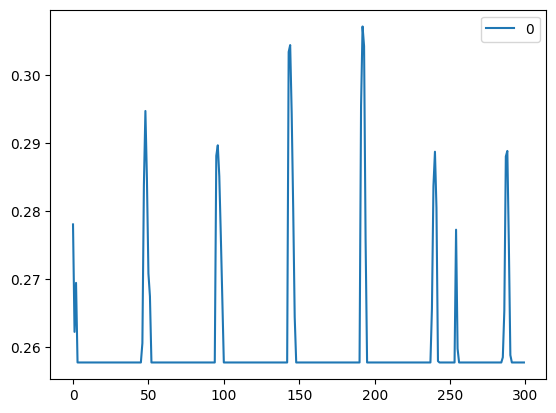

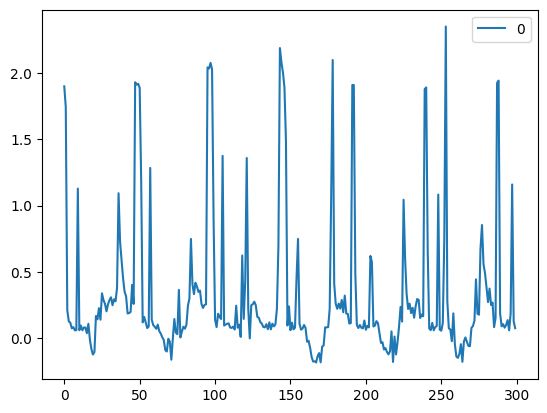

In [30]:
import pandas as pd
pd.DataFrame(result).plot()
pd.DataFrame(target).plot()